# **Unstructured Data Analytics** 
## Course Project
### *Aiden McFadden, Ariel Simmons*
### *James Caggiano, Matthew Cabrera, and Tom Song*
###Code Link: https://colab.research.google.com/drive/1VqUXNsczqo0Y4Ke_X2OsTPUC0UnQujcz?usp=sharing

First, we have to load in all of the packages and data that we need in order to do the exploration

In [ ]:
# I think we only need to do this part once, so I have commented out the next
# few lines
#from google.colab import drive
#drive.mount('/content/drive')
# now you'll have to visit a link, log in, and copy paste a code

# This code only works when you run the file in Colab. My Colab is messed up so I run in Jupyter Notebook. -Ari

In [ ]:
import os
import pandas as pd 
file_location = '/Volumes/GoogleDrive/Shared drives/Unstructured Data Analysis Group Project/IDOC Mugshots/' 
#the file_location might change for each of you
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import os # accessing directory structure
import random
import PIL
import PIL.Image
from sklearn.model_selection import train_test_split
import glob
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# **Text Analysis of Offenses**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving labels_utf8.csv to labels_utf8.csv


Loading in the labels file

In [ ]:
label_df = pd.read_csv('labels_utf8.csv')

In [ ]:
import nltk 
nltk.download('punkt')
nltk.download('vader_lexicon')
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Converting the offenses into a singular string

In [ ]:
label_text = label_df['Offense']

offense = ''

for i in range(len(label_text)):
  offense += " "+str(label_text[i])

Tokenize words and create a vocab

In [ ]:
off_tokens = word_tokenize(offense)
cvect = CountVectorizer(stop_words="english", max_features=1000)
X = cvect.fit_transform(off_tokens)
vocab = cvect.get_feature_names() 

Topic Modeling for the Offenses

In [ ]:
NUM_TOPICS = 5

topic_model = LatentDirichletAllocation(n_components=NUM_TOPICS, random_state=123123)  
topic_model.fit(X) 

KeyboardInterrupt: ignored

In [ ]:
TOP_N = 5 
topic_norm = topic_model.components_ / topic_model.components_.sum(axis=1)[:, np.newaxis]

for idx, topic in enumerate(topic_norm):
    print("Topic id: {}".format(idx))
    top_tokens = np.argsort(topic)[::-1] 
    for i in range(TOP_N):
        print('{}: {}'.format(vocab[top_tokens[i]], topic[top_tokens[i]]))
    print()


NameError: ignored

Creating test and training data from the offense and sex offender data

In [ ]:
import sklearn

training_text, test_text, training_labels, test_labels = sklearn.model_selection.train_test_split(label_df['Offense'], label_df['Sex Offender'],
                                                                            train_size=0.65,test_size=0.35, random_state=6969)

Using Vader Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sid = SentimentIntensityAnalyzer() 
for txt, lbl in zip(training_text[1000:2000:100], training_labels[1000:2000:100]):
  print(txt, lbl)
  ss = sid.polarity_scores(txt) 
  for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')
  print('\n------------------\n\n')


HOME INVASION/CAUSE INJURY, AGG BATTERY/GREAT BODILY HARM False
compound: -0.743, neg: 0.558, neu: 0.442, pos: 0.0, 
------------------


MFG/DEL 15 False
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
------------------


FELON POSS/USE WEAPON/FIREARM False
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
------------------


AGG BATTERY/PEACE OFFICER, FELON POSS/USE FIREARM PRIOR, ARMED VIO/CATEGORY I WEAPON, AGG BATTERY/WEAPON/NO FIREARM, FELON POSS/USE WEAPON/FIREARM, AGG BATTERY/GREAT BODILY HARM, BURGLARY False
compound: -0.6908, neg: 0.231, neu: 0.769, pos: 0.0, 
------------------


THEFT/DISP MERCH/, POSS AMT CON SUB EXCEPT(A)/(D) False
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
------------------


ATTEMPT ARMED ROBBERY/ARMED W/FIREARM False
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
------------------


MFG/DEL 1, MFG/DEL CAN 2.5, ESCAPE/VIOLATE ELEC MONITORING False
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
------------------


HOME INVASION/CAUSE INJURY False
compoun

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Using Naive Bayes Text Analysis

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

vect = CountVectorizer()
X = vect.fit_transform(training_text) 

label_enc = LabelEncoder()
Y = label_enc.fit_transform(training_labels) 
print(label_enc.classes_)
nb = MultinomialNB() 


nb.fit(X, Y)


[False  True]


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Testing the Vader Model

In [ ]:
test_preds = []

for t in test_text:
  ss = sid.polarity_scores(t)
  score = ss['compound']
  if score > 0:
    test_preds.append(4)  # positive
  else:
    test_preds.append(0)  # negative 

print('test accuracy: {}'.format(np.sum(test_preds == test_labels) / len(test_labels)))
print('-------')

for i in range(0, 325, 25): 
  ss = sid.polarity_scores(test_text.iloc[i])
  print(test_text.iloc[i])
  for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')
  print('prediction: {}, true: {}'.format(test_preds[i], test_labels.iloc[i]))
  print('------------------')


test accuracy: 0.8701718494271686
-------
AGG BTRY/CHIL
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, prediction: 0, true: False
------------------
OTHER AMT NARCOTIC SCHED I&II, 18+ DEL SUB, OTHER AMT NARCOTIC SCHED I&II, OTHER AMT NARCOTIC SCHED I&II
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, prediction: 0, true: False
------------------
AGG BATTERY/GREAT BODILY HARM, ROBBERY
compound: -0.5423, neg: 0.467, neu: 0.533, pos: 0.0, prediction: 0, true: False
------------------
MURDER/STRONG PROB KILL/INJURE
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, prediction: 0, true: False
------------------
ATTEMPT BURGLARY, THEFT CON INTENT PERSON, BURGLARY, ATTEMPT BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, AMT NARC SCHED I/II/SCH/HS/PK
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, prediction: 0, true: False
------------------
ATTEMPT MURDER/INTENT TO KILL/INJURE, MURDER/INTENT TO KILL/INJURE
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, prediction: 0, true: Tr

Testing the Naive Bayes model

In [ ]:
X_test = vect.transform(test_text)
Y_test = label_enc.transform(test_labels)

preds = nb.predict(X_test) 

print('test accuracy: {}'.format(np.sum(preds == Y_test) / len(Y_test)))


for i in range(0, 325, 25): 
  print('Predicted label: {}, true label: {}, offense: {}'.format(preds[i], Y_test[i], test_text.iloc[i]))




test accuracy: 0.9620294599018003
Predicted label: 0, true label: 0, offense: AGG BTRY/CHIL
Predicted label: 0, true label: 0, offense: OTHER AMT NARCOTIC SCHED I&II, 18+ DEL SUB, OTHER AMT NARCOTIC SCHED I&II, OTHER AMT NARCOTIC SCHED I&II
Predicted label: 0, true label: 0, offense: AGG BATTERY/GREAT BODILY HARM, ROBBERY
Predicted label: 0, true label: 0, offense: MURDER/STRONG PROB KILL/INJURE
Predicted label: 0, true label: 0, offense: ATTEMPT BURGLARY, THEFT CON INTENT PERSON, BURGLARY, ATTEMPT BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, AMT NARC SCHED I/II/SCH/HS/PK
Predicted label: 0, true label: 1, offense: ATTEMPT MURDER/INTENT TO KILL/INJURE, MURDER/INTENT TO KILL/INJURE
Predicted label: 0, true label: 0, offense: MURDER/INTENT TO KILL/INJURE, ARMED ROBBERY
Predicted label: 0, true label: 0, offense: AGG DUI/4, AGG DUI/NO VALID DL
Predicted label: 0, true label: 0, offense: POSS AMT CON SUB EXCEPT(A)/(D), POSS AMT CON SUB EXCEPT(A)/(D), OTHE

Creating a frequency distribution for the offenses

In [ ]:
import matplotlib.pyplot as plt
from nltk import *


fdist = FreqDist(off_tokens)

Terms like burglary, kill/injure, armed, robbery, and firearm quickly become the more common terms.

6528044


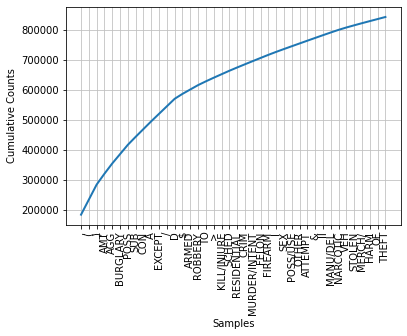

In [ ]:
print(len(offense))
fdist.plot(40, cumulative=True)

In [ ]:
Another closer look does show similar results, but also shows that within the data, a lot of abbreviations throws the actual results off. 

In [ ]:
print(fdist.most_common(200))

[(',', 185410), ('(', 50079), (')', 50053), ('AMT', 36132), ('AGG', 34169), ('BURGLARY', 31039), ('POSS', 31033), ('SUB', 26550), ('CON', 25888), ('A', 25790), ('EXCEPT', 24936), ('/', 24936), ('D', 24936), ('$', 16339), ('ARMED', 14612), ('ROBBERY', 14521), ('TO', 12556), ('>', 11985), ('KILL/INJURE', 11569), ('SCHED', 11561), ('RESIDENTIAL', 10935), ('CRIM', 10626), ('MURDER/INTENT', 10539), ('FELON', 10485), ('FIREARM', 10366), ('I', 9901), ('SEX', 9475), ('POSS/USE', 9277), ('OTHER', 9251), ('ATTEMPT', 9231), ('&', 9165), ('II', 9158), ('MANU/DEL', 8959), ('NARCOTIC', 8778), ('VEH', 7858), ('STOLEN', 7219), ('MERCH/', 7111), ('HARM', 6871), ('OF', 6855), ('THEFT', 6838), ('GR', 6657), ('CONT', 6329), ('SUBS', 6306), ('THEFT/DISP', 6096), ('PRIOR', 5105), ('AGGRAVATED', 4865), ('DOMESTIC', 4722), ('DRIVING', 4431), ('RET', 4360), ('METH', 4339), ('WEAPON/FIREARM', 4262), ('RETAIL', 4193), ('COCAINE/ANLG', 4160), ('THEFT/RETURN', 4134), ('CRIMINAL', 4129), ('150', 4112), ('01-15', 40

Lastly, ran another Naive Bayes model to see if there was any correlation between offenses and race.

In [ ]:
import sklearn

training_text, test_text, training_labels, test_labels = sklearn.model_selection.train_test_split(label_df['Offense'], label_df['Race'],
                                                                            train_size=0.65,test_size=0.35, random_state=6969)

In [ ]:
vect = CountVectorizer()
X = vect.fit_transform(training_text) 

label_enc = LabelEncoder()
Y = label_enc.fit_transform(training_labels) 
print(label_enc.classes_)
nb = MultinomialNB() 


nb.fit(X, Y)

['Amer Indian' 'Asian' 'Bi-Racial' 'Black' 'Hispanic' 'Not Available'
 'White']


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Luckily our results here have very low accuracy which shows that there are no true resemblances between offenses and race. Although an accuracy of 57.7% is concerning, the model is not inherently racist by accurately matching certain crimes with certain people of color.

In [ ]:
X_test = vect.transform(test_text)
Y_test = label_enc.transform(test_labels)

preds = nb.predict(X_test) 

print('test accuracy: {}'.format(np.sum(preds == Y_test) / len(Y_test)))


for i in range(0, 325, 25): 
  print('Predicted label: {}, true label: {}, offense: {}'.format(preds[i], Y_test[i], test_text.iloc[i]))

test accuracy: 0.5770049099836334
Predicted label: 6, true label: 6, offense: AGG BTRY/CHIL
Predicted label: 3, true label: 3, offense: OTHER AMT NARCOTIC SCHED I&II, 18+ DEL SUB, OTHER AMT NARCOTIC SCHED I&II, OTHER AMT NARCOTIC SCHED I&II
Predicted label: 3, true label: 3, offense: AGG BATTERY/GREAT BODILY HARM, ROBBERY
Predicted label: 4, true label: 3, offense: MURDER/STRONG PROB KILL/INJURE
Predicted label: 3, true label: 3, offense: ATTEMPT BURGLARY, THEFT CON INTENT PERSON, BURGLARY, ATTEMPT BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, BURGLARY, AMT NARC SCHED I/II/SCH/HS/PK
Predicted label: 4, true label: 3, offense: ATTEMPT MURDER/INTENT TO KILL/INJURE, MURDER/INTENT TO KILL/INJURE
Predicted label: 3, true label: 3, offense: MURDER/INTENT TO KILL/INJURE, ARMED ROBBERY
Predicted label: 4, true label: 6, offense: AGG DUI/4, AGG DUI/NO VALID DL
Predicted label: 3, true label: 3, offense: POSS AMT CON SUB EXCEPT(A)/(D), POSS AMT CON SUB EXCEPT(A)/(D), OTHE

# **Image Analysis**

In [ ]:
# Create variable with filepath for all Front-facing mugshots
front_dir = '/Volumes/GoogleDrive/Shared drives/Unstructured Data Analysis Group Project/IDOC Mugshots/Front/'
# Assign empty list to variable fdir
fdir = []
# Iterate through all of the extended filepaths within front_dir, join with the front_dir string
# and append each new filepath to list fdir 
for path in os.listdir(front_dir):
    full_path = os.path.join(front_dir, path)
    if os.path.isfile(full_path):
        fdir.append(full_path)
# Replace contents of front_dir with contents of fdir
front_dir = fdir
    
# Create variable with filepath for all Side-facing mugshots
side_dir = '/Volumes/GoogleDrive/Shared drives/Unstructured Data Analysis Group Project/IDOC Mugshots/Side/'
# Assign empty list to variable sdir
sdir = []
# Iterate through all of the extended filepaths within side_dir, join with the side_dir string
# and append each new filepath to list sdir
for path in os.listdir(side_dir):
    full_path = os.path.join(side_dir, path)
    if os.path.isfile(full_path):
        sdir.append(full_path)
# Replace contents of side_dir with contents of sdir
side_dir = sdir

# this didn't work
#side_directory = []
#for name in glob.glob('/Volumes/GoogleDrive/Shared drives/Unstructured Data Analysis Group Project/IDOC Mugshots/Side/*'): 
    #side_directory.append(name)
#print(len(side_directory))

# To check and see if the lists are the same length, we print length
image_count_front = len(front_dir)
image_count_side = len(side_dir)
print(image_count_front)
print(image_count_side)
# The front_dir list is 3 items longer than the side_dir list!

70008
70005


In [ ]:
# Play around with PIL library to better understand the images we are dealing with
# And checking if the filepaths work for each list
example_image = PIL.Image.open(str(front_dir[1234]))

In [ ]:
# Check size of the front-facing image
example_image.size

In [ ]:
# load the image
example_image

In [ ]:
# Do the same for a side-facing image
example_image_2 = PIL.Image.open(str(side_dir[60000]))

In [ ]:
# Check the size of side-facing image
example_image_2.size

In [ ]:
# DO NOT RUN THIS BLOCK. A failed attempt

# this takes a while to run seeing as it is trying to match up two 70,000-item lists
# doesn't really work because too much data... might not work regardless. would not run this cell block

# def matching_function(list1, list2):
#    oddballs = []
#    for i in list1:
#        if i not in list2:
#            oddballs.append(i)
#    return oddballs

# checking = matching_function(front_dir, side_dir)

In [ ]:
# Set random seed to 69696969
random.seed(69696969)
p = .03  # roughly 3% of the lines
# keep the header, then take only 3% of lines while reading in csv of information
# abotu each image, and assign to subset_df
subset_df = pd.read_csv(
    '/Volumes/GoogleDrive/Shared drives/Unstructured Data Analysis Group Project/IDOC Mugshots/labels_utf8.csv',
    #the location of the file for each of you might be different
    header=0,
    skiprows=lambda i: i>0 and random.random() > p
)
# Save shape of subset_df to variables nRow, nCol
nRow, nCol = subset_df.shape
# Print statement giving the size of subset_df in fancy print
print(f'There are {nRow} rows and {nCol} columns')

There are 2121 rows and 9 columns


In [ ]:
# Filter the dataframe down to 3 races for labeling
subset_df = subset_df[(subset_df['Race']=='Black') | (subset_df['Race']=='White') | (subset_df['Race']=='Hispanic')]

In [ ]:
# Save shape of subset_df to variables nRow, nCol
nRow, nCol = subset_df.shape
# Print statement giving the new size of subset_df
print(f'There are {nRow} rows and {nCol} columns')

There are 2109 rows and 9 columns


In [ ]:
# Create list of IDs from subset_df 'ID' column in subset_df so that the corresponding 
# Filepaths can be pulled from the directories for front-facing and side-facing images
# Assign to variable IDs_list
IDs_list = subset_df['ID'].tolist()

In [ ]:
# create subpopulations to work with for the neural network with the random sample we took

# Set front_directory to string of filepath for the front-facing photo folder
front_directory = '/Volumes/GoogleDrive/Shared drives/Unstructured Data Analysis Group Project/IDOC Mugshots/Front/'
# Assign empty list to variable subset_front_dir
subset_front_dir = []
# Split the full path for every filepath in front_directory into a head and tail and assign to variable:
# split_path_1
split_path_1 = [os.path.split(i) for i in os.listdir(front_directory)]
# iterate through split_path_1 and assign the head and tail in each path to variables head and tail
# if the tail is located in IDs_list, append the tail to list subset_front_dir
for path in split_path_1:
    head, tail = path
    if tail in IDs_list:
        subset_front_dir.append(tail)
# Using fancy print, concatenate the strings from front_directory and each value in subset_front_dir
# To create new filepaths for photos corresponding to subset_df
# Assign to variable front_subpopulation
front_subpopulation = ["{}{}".format(front_directory,i) for i in subset_front_dir]
       
# Set front_directory to string of filepath for the side-facing photo folder
side_directory = '/Volumes/GoogleDrive/Shared drives/Unstructured Data Analysis Group Project/IDOC Mugshots/Side/'
# Assign empty list to variable subset_side_dir
subset_side_dir = []
# Split the full path for every filepath in side_directory into a head and tail and assign to variable:
# split_path_2
split_path_2 = [os.path.split(i) for i in os.listdir(side_directory)]
# iterate through split_path_2 and assign the head and tail in each path to variables head and tail
# if the tail is located in IDs_list, append the tail to list subset_side_dir
for path in split_path_2:
    head, tail = path
    if tail in IDs_list:
        subset_side_dir.append(tail)
# Using fancy print, concatenate the strings from side_directory and each value in subset_side_dir
# To create new filepaths for photos corresponding to subset_df
# Assign to variable side_subpopulation
side_subpopulation = ["{}{}".format(side_directory,i) for i in subset_side_dir]

In [ ]:
# checking to make sure everything seems to match up
# front_subpopulation and side_subpopulation seem to be shuffled,
# so we use the sort() method to align them to each other
front_subpopulation.sort()
side_subpopulation.sort()
# print to check that the same path is in the same position in both lists
print(front_subpopulation[123])
print(side_subpopulation[123])

/Volumes/GoogleDrive/Shared drives/Unstructured Data Analysis Group Project/IDOC Mugshots/Front/B43044
/Volumes/GoogleDrive/Shared drives/Unstructured Data Analysis Group Project/IDOC Mugshots/Side/B43044


In [ ]:
# DO NOT RUN THIS CELL
# original code.... we don't need it anymore
#front_subpop_images = []
#for image in front_subpopulation:
#    mugshot = PIL.Image.open(str(image))
#    mugshot = mugshot.resize((476,476))
#    front_subpop_images.append(mugshot)
#side_subpop_images = []
#for image in side_subpopulation:
#    mugshot = PIL.Image.open(str(image))
#    mugshot = mugshot.resize((476,476))
#    side_subpop_images.append(mugshot)
# use these image lists in the train_test_split instead of the subpop lists

In [ ]:
# Create empty list front_subpop_images
front_subpop_images = []
# Iterate through each filepath in front_subpopulation and perform the following:
# use PIL to open the image assign it to variable frontmug
# use PIL to resize each image to dimensions 476 pixels by 476 pixels
# use matplotlib to convert the PIL image to an array and save to variable imgfront
# scale imgfront array down to 0-1 range
# convert array imgfront to tensor
# append tensor to list front_subpop_images
for image in front_subpopulation:
    frontmug = PIL.Image.open(str(image))
    frontmug = frontmug.resize((476,476))
    imgfront = mpimg.pil_to_array(frontmug)
    imgfront = imgfront/255.
    imgfront = tf.convert_to_tensor(imgfront, dtype=tf.float32)
    front_subpop_images.append(imgfront)
# Create empty list side_subpop_images
side_subpop_images = []
# Iterate through each filepath in side_subpopulation and perform the following:
# use PIL to open the image assign it to variable sidemug
# use PIL to resize each image to dimensions 476 pixels by 476 pixels
# use matplotlib to convert the PIL image to an array and save to variable imgside
# scale imgside array down to 0-1 range
# convert array imgside to tensor
# append tensor to list side_subpop_images
for image in side_subpopulation:
    sidemug = PIL.Image.open(str(image))
    sidemug = sidemug.resize((476,476))
    imgside = mpimg.pil_to_array(sidemug)
    imgside = imgside/255.
    imgside = tf.convert_to_tensor(imgside, dtype=tf.float32)
    side_subpop_images.append(imgside)

In [ ]:
# Take a look at subset_df to see what it looks like 
subset_df.head(10)

In [ ]:
# Look at contents of subset DF again
subset_df.describe()

In [ ]:
# Do not run cell
# sum(subset_df['Race'] == 'Black')

In [ ]:
# use groupby method to look at subset_df by Race 
Race_GroupBy = subset_df.groupby("Race")
Race_GroupBy.describe()

In [ ]:
# get all of the values from 'Race' column in subset_df and convert them to list
# assign to labels variable
labels = subset_df['Race'].tolist()

In [ ]:
# inspect first 10 values in list
labels[0:10]

['Black',
 'Black',
 'Black',
 'White',
 'Black',
 'Black',
 'White',
 'Black',
 'Black',
 'Black']

In [ ]:
# use LabelEncoder method from sklearn to convert race labels to 0,1,2
# use new numeric labels to convert to tensors and then run the model
from sklearn.preprocessing import LabelEncoder
# Save LabelEncoder method as variable label_enc
label_enc = LabelEncoder()
# Use label_enc to transform the labels classes to 3 numbers (0, 1, 2)
# assign to variabel labels_num 
labels_num = label_enc.fit_transform(labels) 
# print the classes to check that it is only 3 
print(label_enc.classes_)
# print results of labels_num to check data
print(labels_num)

['Black' 'Hispanic' 'White']
[0 0 0 ... 0 0 2]


In [ ]:
# convert labels_num to list
labels_num = labels_num.tolist()

In [ ]:
# Iterate through list labels_num and convert each label to a tensor
for label in labels_num:
    label = tf.convert_to_tensor(label, dtype=tf.float32)

In [ ]:
# check data in labels_num
labels_num

[0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,


In [ ]:
import sklearn

In [ ]:
# time to try and build this model
# use train_test_split method from sklearn to split training and test data, using stratify parameter to 
# keep the data proportional to sample
# assign results to variables front_train, front_test, side_train, side_test, labels_train, and labels_test
front_train, front_test, side_train, side_test, labels_train, labels_test = sklearn.model_selection.train_test_split(front_subpop_images,
                                                                                                                   side_subpop_images,
                                                                                                                   labels_num,
                                                                                                                   train_size=0.65,
                                                                                                                   test_size=0.35,
                                                                                                                   random_state=696969,
                                                                                                                  stratify = labels)

In [ ]:
# Failed attempt
# time to try and build this model
# front_train, front_test, side_train, side_test, labels_train, labels_test = sklearn.model_selection.train_test_split(front_subpopulation,
#                                                                                                                   side_subpopulation,
#                                                                                                                   labels,
#                                                                                                                   train_size=0.65,
#                                                                                                                   test_size=0.35,
#                                                                                                                   random_state=696969,
#                                                                                                                  stratify = labels)

In [ ]:
# Convert each variable to a dataset using from_tensor_slices() method from tensorflow
train_dataset = tf.data.Dataset.from_tensor_slices((front_train, labels_train))
test_dataset = tf.data.Dataset.from_tensor_slices((front_test, labels_test))

In [ ]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
# def tensorizer(data):
#    new_data = tf.convert_to_tensor(data, dtype=tf.float32)
#    return new_data

In [ ]:
#labels_train = np.asarray(labels_train)
#labels_test = np.asarray(labels_test)

In [ ]:
#tensorizer(labels_train)
#tensorizer(labels_test)

In [ ]:
# create first Sequential model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(476, 476, 3)),
  tf.keras.layers.Dense(3, activation='softmax')
])

model_1.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 679728)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 2039187   
Total params: 2,039,187
Trainable params: 2,039,187
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# train the model
model_1.fit(train_dataset,
            #validation_split = 0.2,
            epochs=5,
            batch_size=128)

Epoch 1/5
22/22 [==============================] - 65s 3s/step - loss: 93.2500 - accuracy: 0.5350
Epoch 2/5
22/22 [==============================] - 26s 1s/step - loss: 20.4149 - accuracy: 0.6949
Epoch 3/5
22/22 [==============================] - 21s 968ms/step - loss: 17.1661 - accuracy: 0.7168
Epoch 4/5
22/22 [==============================] - 28s 1s/step - loss: 13.7565 - accuracy: 0.7241
Epoch 5/5
22/22 [==============================] - 31s 1s/step - loss: 9.4370 - accuracy: 0.7263


In [ ]:
# return the loss and the accuracy for the test images
model_1.evaluate(test_dataset)

12/12 [==============================] - 58s 5s/step - loss: 11.0153 - accuracy: 0.7876


[11.015312194824219, 0.7875507473945618]

In [ ]:
model_1.predict(test_dataset)

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [5.3621172e-16, 0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [2.3345099e-21, 3.0948183e-32, 1.0000000e+00],
       [1.0000000e+00, 1.3835845e-28, 5.7132172e-23]], dtype=float32)

In [ ]:
first_predictions = model_1.predict(test_dataset)

predictions_1 = np.argmax(first_predictions, axis = 1) # take prediction for each row

In [ ]:
print(len(predictions_1))

739


In [ ]:
predictions_1

array([2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,

In [ ]:
# confusion matrix 

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
# create confusion matrix using sklearn's confusion_matrix() method
front_model_cmatrix = sklearn.metrics.confusion_matrix(labels_test, predictions_1)

In [ ]:
# print results
print('Confusion Matrix')
print('Black Hispanic White')
print(front_model_cmatrix)

## Older code below was used to do summary statistics and plot images on the original dataset. 

### Graph function were found with the dataset on Kaggle

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotPerColumnDistribution(df1, 10, 5)

#Loading the first image from the sample dataset just to make sure it works
imgfront = mpimg.imread(
    '/Volumes/GoogleDrive/Shared drives/Unstructured Data Analysis Group Project/IDOC Mugshots/Front/A01694')
imgfrontplot = plt.imshow(imgfront)